### Lego Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/lego-analysis/master/datasets/lego_sets.csv')
theme = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/lego-analysis/master/datasets/parent_themes.csv')

#### Question 1: What percentage of all licensed sets ever released were Star Wars themed?

In [2]:
merged_df = df.merge(theme, left_on='parent_theme', right_on='name')
merged_df.drop(columns=['name_y'], inplace=True)
merged_df.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland,411,False
2,00-3,Weetabix Promotional House 2,1976,NaN,Building,Legoland,411,False
3,00-4,Weetabix Promotional Windmill,1976,126.0,Building,Legoland,411,False
4,00-7,Weetabix Promotional Lego Village,1976,NaN,Building,Legoland,411,False


In [3]:
merged_df['set_num'].isna().sum()

153

In [4]:
licensed = merged_df[merged_df['is_licensed']]
licensed = licensed.dropna(subset=['set_num'])

star_wars = licensed[licensed['parent_theme'] == 'Star Wars']
the_force = int((star_wars.shape[0]/licensed.shape[0])*100)
print(the_force, '%')

51 %


#### Question 2: In which year was Star Wars not the most popular licensed theme (in terms of number of sets released that year)?

In [6]:
licensed_sorted = licensed.sort_values('year')
licensed['count'] = 1

summed_df = licensed_sorted.groupby(['year', 'parent_theme']).sum().reset_index()

max_df = summed_df.sort_values('count', ascending=False).drop_duplicates(['year'])
max_df.sort_values('year', inplace=True)
max_df

,year,parent_theme,num_parts,id,is_licensed,count
0,1999,Star Wars,1384.0,2054,13,13
2,2000,Star Wars,2580.0,4108,26,26
4,2001,Star Wars,2949.0,2212,14,14
6,2002,Star Wars,4735.0,4424,28,28
9,2003,Star Wars,6660.0,5056,32,32
12,2004,Star Wars,1659.0,3160,20,20
16,2005,Star Wars,4730.0,4424,28,28
20,2006,Star Wars,2769.0,1738,11,11
24,2007,Star Wars,11361.0,2528,16,16
28,2008,Star Wars,6865.0,3634,23,23


In [7]:
new_era = 2017

#### Question 3: Break down number of sets by year

In [11]:
sets_year = merged_df
sets_year['count'] = 1
set_per_year = sets_year.groupby(['year']).sum().reset_index()[['year', 'count']]
# for index, row in set_per_year.iterrows():
#     print(row['year'], row['count'])

set_per_year

,year,count
0,1950,7
1,1953,4
2,1954,14
3,1955,28
4,1956,12
...,...,...
61,2013,608
62,2014,732
63,2015,680
64,2016,634


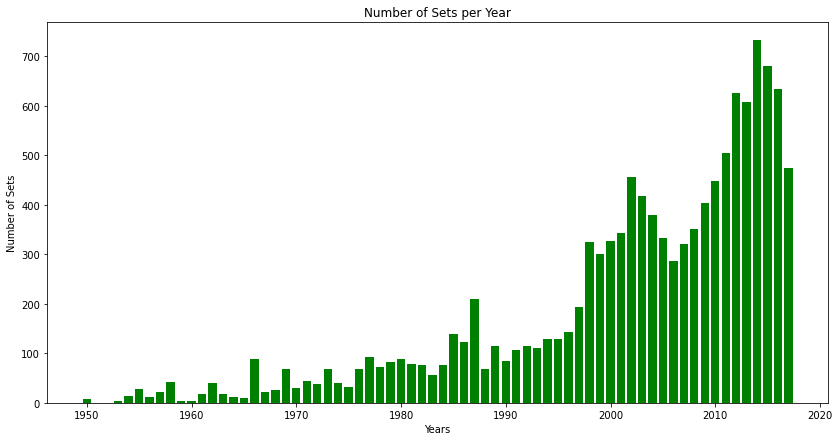

In [20]:
years = set_per_year['year']
values = set_per_year['count']

plt.figure(figsize=(14,7))
plt.bar(years, values, color='g')
plt.xlabel('Years')
plt.ylabel('Number of Sets')
plt.title('Number of Sets per Year')
plt.show()